<a href="https://colab.research.google.com/github/RajaSubramanian10/Glucose-level-Analysis---Regression-Model/blob/main/Glucose_Analysis_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Glucose Analysis using Regression @Author: R. Raja Subramanian**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score


In [ ]:
data = pd.read_csv("Diabetes_Classification( from DATA world).csv")

cs = {'female': 0, 'male': 1}
data['Gender'] = data['Gender'].map(cs)
X = data[["Age", "Gender", "Height", "Weight", "Systolic BP", "Diastolic BP"]]
y = data["Glucose"]


In [ ]:
LINEAR REGRESSION

Coefficients:
 [ 1.08313212  0.71888416  1.04421024  0.24197431  0.01250872 -0.02281039]
Intercept:
 -55.86120587532085
Variance:
 0.10444332481202456


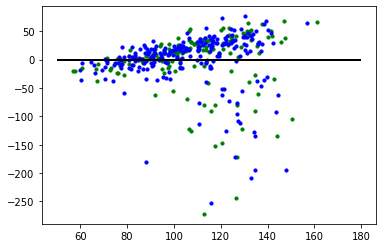

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
 
print("Coefficients:\n",linear_regression.coef_)
print("Intercept:\n",linear_regression.intercept_)

print("Variance:\n",linear_regression.score(x_test,y_test))
 
plt.scatter(linear_regression.predict(x_test),linear_regression.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(linear_regression.predict(x_train),linear_regression.predict(x_train)-y_train, color="blue", s=10, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)

In [ ]:
POLYNOMIAL REGRESSION

Coefficients:
 [ 1.65713765e-09 -1.78091763e+00  1.26966898e+02 -3.17156019e+01
 -3.55068242e-01 -8.31422780e+00  1.07852408e+01  3.77934026e-03
  7.16389207e-01 -1.35781449e-02  8.66111029e-03  2.45999971e-02
 -2.17466097e-02  1.26966898e+02 -4.77395524e+00  2.97916915e-01
 -1.30040413e+00  1.82873982e+00  2.13692055e-01  1.29091567e-02
  1.41068072e-01 -1.69009704e-01 -1.18601736e-03 -1.09250761e-03
 -1.76344774e-03 -1.52344026e-02  3.55471005e-02 -2.43942593e-02]
Variance:
 0.0707627902177076
R2:
 0.2304531164554502


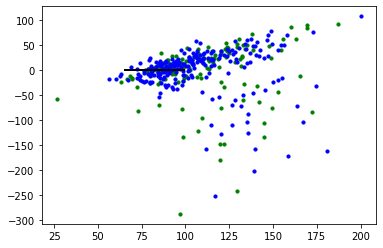

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
XP = poly_reg.fit_transform(X)

# Train and Test data split
x_train, x_test, y_train, y_test = train_test_split(XP,y,test_size=0.4,random_state=1)
 

# Define the multiple linear regression formula
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
 
print("Coefficients:\n",linear_regression.coef_)
print("Variance:\n",linear_regression.score(x_test,y_test))
print("R2:\n",r2_score(y_train, linear_regression.predict(x_train)) )
 
plt.scatter(linear_regression.predict(x_test),linear_regression.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(linear_regression.predict(x_train),linear_regression.predict(x_train)-y_train, color="blue", s=10, label="Train data")
 
plt.hlines(y=0, xmin=65,xmax=100,linewidth=2)

CV Mean: 0.05224406454402597
STD: 0.20217774290475113
Coefficients: [ 1.0831322   0.71886168  1.04421195  0.24197429  0.01250868 -0.02281031]
Intercept: -55.86130862991524
Variance:
 0.10444332741036422


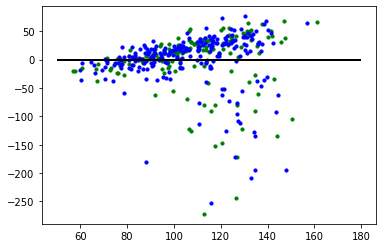

In [ ]:
# Ridge Regression Model 
from sklearn.model_selection import cross_val_score
def crossvalidation(model):
  scores = cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
  print('CV Mean:', np.mean(scores))
  print('STD:', np.std(scores))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
r=crossvalidation(ridge)
print("Coefficients:",ridge.coef_)
print("Intercept:",ridge.intercept_)
print("Variance:\n",ridge.score(x_test,y_test))
 
plt.scatter(ridge.predict(x_test),ridge.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(ridge.predict(x_train),ridge.predict(x_train)-y_train, color="blue", s=10, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)

CV Mean: 0.05351188633639312
STD: 0.2011631544077523
Coefficients: [ 1.08625684  0.          1.1014988   0.24121016  0.01022775 -0.01912516]
Intercept: -59.33489070506104
Variance:
 0.10443884867363862


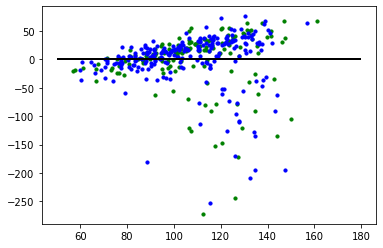

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
crossvalidation(lasso)
print("Coefficients:",lasso.coef_)
print("Intercept:",lasso.intercept_)
print("Variance:\n",lasso.score(x_test,y_test))
 
plt.scatter(lasso.predict(x_test),lasso.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(lasso.predict(x_train),lasso.predict(x_train)-y_train, color="blue", s=10, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)